# QASM simulator and visualization

In this notebook we will play a bit with `QasmSimulator` and `plot_histogram`

In [1]:
from qiskit import QuantumCircuit, BasicAer, execute, IBMQ
from qiskit.visualization import plot_histogram

## Histogram of Probabilities 

Let's plot some histograms with `plot_histogram` 

<b> 1. First, we choose a QuantumCircuit <b> 
    
* GHZ circuit

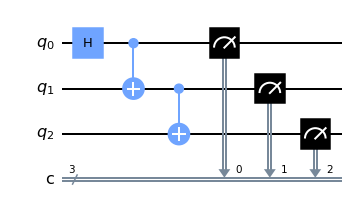

In [2]:
ghz = QuantumCircuit(3,3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
#ghz.barrier(0,2) 
ghz.measure([0,1,2],[0,1,2])
# also possible to measure only one qubit with the desired classical bit.
#For example, qubit 2 with classical bit 1: qc.measure(1,0) 

ghz.draw('mpl')

In drawing a circuit, those are the possible options:

* 'mpl'
* 'latex'
* 'text'
* 'latex_source'

<b> 2. Now, we run the circuit with qasm_simulator <b>

In [3]:
backend = BasicAer.get_backend('qasm_simulator')

result = execute(ghz, backend).result() #shots=1024 is by default defined
counts = result.get_counts()

<b> 3. Finally, we plot the histograms based on the counts we got <b>

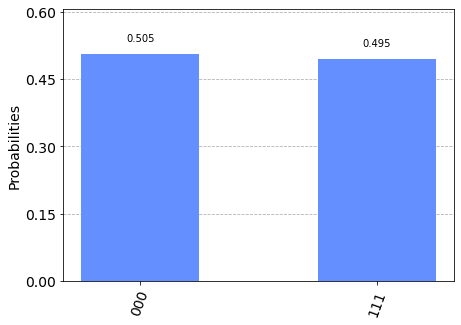

In [4]:
plot_histogram(counts)

<b> 3. We can add some features to the histogram <b>

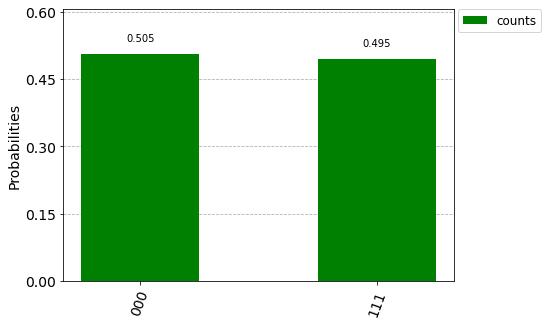

In [5]:
leg = ['counts']
plot_histogram(counts, legend=leg, sort='asc',color='green') 

Besides, we can:

* add more counts to the same histogram
* change bar colors
* add legend
* change figure size

For example:

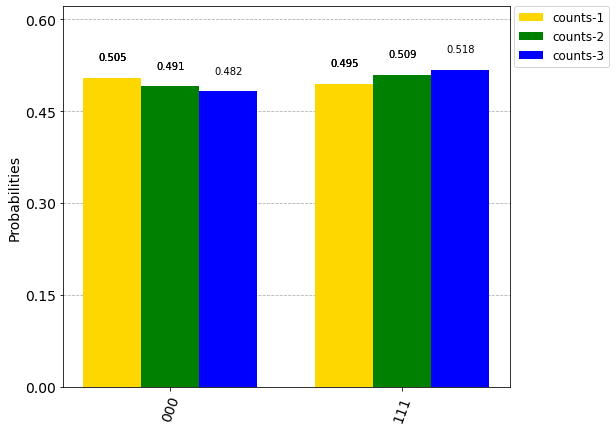

In [6]:
# for more counts, we have

job2 = execute(ghz, backend, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()

job3 = execute(ghz, backend, shots=1024)
result3 = job3.result()
counts3 = result3.get_counts()

#brazilian flag :D 
leg = ['counts-1','counts-2', 'counts-3']
plot_histogram([counts,counts2,counts3], legend=leg, sort='asc', figsize = (8,7), 
               color=['gold','green','blue']) 

<b> Default colors and size:<b> 

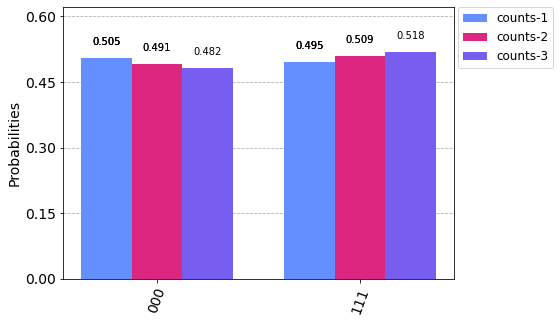

In [7]:
plot_histogram([counts,counts2,counts3], legend=leg, sort='asc') 

## Specifing a coupling

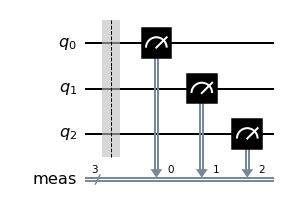

In [8]:
qc_spec = QuantumCircuit(3)
qc_spec.measure_all()

backend = BasicAer.get_backend('qasm_simulator')
#specify some linear connection
couple_map = [[0,1],[1,2]]

qc_spec.draw('mpl')

Note, it couples measurement of qubit 0 to bit 0, qubit 1 to bit 1, and qubit 2 to bit 2 (that`s why linear)

In [9]:
job = execute(qc_spec,backend, shots= 1024, coupling_map = couple_map)
results = job.result()
counts = result.get_counts()

print(counts)

{'000': 517, '111': 507}


## Real backend by provider


In [10]:
import qiskit.tools.jupyter
from qiskit.tools import job_monitor

<b> 1. Loading a IBM Quantum account <b>

In [11]:
provider = IBMQ.load_account()

<b> 2. Let's check the availability of the backends <b>

In [12]:
%qiskit_backend_overview

<b> 3. Picking one of then <b>

In [13]:
backend_real = provider.get_backend('ibmq_belem') 
job = execute(ghz, backend_real)

job status in real time

In [14]:
job_monitor(job)

Job Status: job has successfully run


<b> 4. Getting the counts for the QuantumCircuit and also its histogram <b>

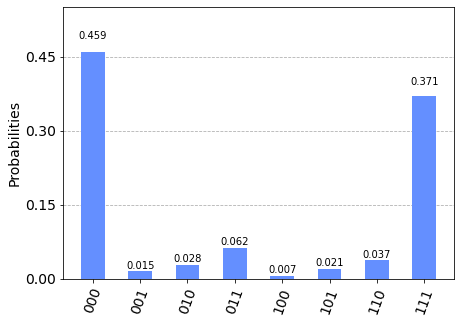

In [15]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

So, the probabilities of measuring $|000\rangle$ and $|111\rangle$ are much greater than other ones. Nevertheless, their occurrence are not zero. This is due to errors in the qubits and the implementation of the gates in the real machines.